# **Recognizing Digits with k-NN**
#### Seungmin Lee 
---

## Introduction:
---
For this project we will be exploring the k-NN function, the k-Nearest Neighbors.

We will be implementing a form of supervised machine learning. Supervised machine learning is basically a concept of where we provide the data as a template for the algorithm to learn and base the output off of. In other words, we feed the algorithm the correct inputs along with the desired output and the algorithms job is to learn the patterns and try to implement the method itself.

The k-NN algorithm is essentially a supervised machine learning algorithm as we will be providing the data to start off as a basis of how we want our function to operate. In our case, we will be implementing it to recognize handwritten digits from 0 to 9.

For the training data and labels, we will be extracting data from the [MNIST database](http://yann.lecun.com/exdb/mnist/) consisting of a collection of 60,000 images.

*Example:*
<img src = "https://www.mth548.org/_images/digits.png" width = 800 height = 500>

For our k-NN function we want it to take in the following parameters:
- `training_data`: A 2-dimensional numpy array where each row consists of an element of the training data.
- `training_labels`: A 1-dimensional numpy array including the labels corresponding to the training data. The label in the $k$-th element will be the corresponding label for the $k$-th row of the `training_data`.
- `x`: A 1-dimensional numpy array consisting of the data point we wish to classify. In other words, it will be an image that will be later classified with a predicted label.
- `n`: An integer signifying the number of neighbors we wish to use for the classification. The value of `n` could potentially affect how accurate the classification is for `x`.

The `knn()` function will return a tuple `(label, neighbors)`, where
- `label` is the predicted label of `x`
- `neighbors` is a list of row numbers from `training_data` that was used for the classification. The volume of `neighbors` will be dependent on the input data of `n`.

## Project:
---

### `gzip`

Before we begin with constructing our `knn()` function, we need to first extract the information within the files pulled from the MNIST database. For this purpose, we will be importing the `gzip` library to properly read and extract the files.

In [2]:
import gzip

with gzip.open("train-images-idx3-ubyte.gz", "rb") as foo: 
    f_img = foo.read()
    
with gzip.open("train-labels-idx1-ubyte.gz", "rb") as foo:
    f_lab = foo.read()
    
import numpy as np
images = np.array([b for b in f_img[16:]]).reshape(-1,28*28)
labels = np.array([b for b in f_lab[8:]])
images[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

```
images = np.array([b for b in f_img[16:]]).reshape(-1,28*28)
labels = np.array([b for b in f_lab[8:]])
```
In the MNIST site, it explained that the first 16 rows of the training images consists of a magic number along with other forms of data that will not be used for the classification process. Thus, when assigning our variable `images`, we cut out the first 16 rows of the numpy array of images.

The same was done for the first 8 rows for the training labels, `labels`.

In [5]:
labels

array([5, 0, 4, ..., 5, 6, 8])

When calling `labels`, we see that we extracted the right information out from the file as all the elements of `labels` are the labels corresponding to the elements of the rows for `training_data`.

### Visualizing Image Arrays

To visually show what each row from `training_data` represent we will reshape the array into a 28x28 matrix.

In [25]:
img = images[90].reshape(28,28)
for i in range(28):
    for j in range(28):
        print(f"{img[i, j]:3}", end =" ")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 214 225  90   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 145 212 253 253  60   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 253 253 246 188  23   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  45 164 254 253 223 108   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  24 236 253 252 124  28   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 100 217 253 218 116   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 158 175 225 253  92   0   0   0   0   0   0   0   0   0 

Printing the image at element 90 shows us the general shape of the image, with the values of each point representing the color ranging from 0 to 255.

We can go beyond that by plotting it through the `matplotlit.pyplot` library.

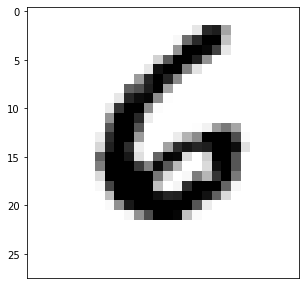

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xticks([])
plt.imshow(img, cmap="gray_r")

In [7]:
lab = labels[90]
lab

6

### Euclidean Distance

As you can see, the image shows to be the number "6". When verifying by checking the label of element 90, it's properly classified as the number "6".

For constructing the `knn()` function, we will determine the closest neighbor by using the Euclidean Distance formula.
$$d(p,q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$$

In [3]:
import math
def ED(input_data, training_data):
    distance = 0
    for i in range(0,len(input_data)):
        distance += pow(input_data[i] - training_data[i], 2)
    return math.sqrt(distance)

To verify whether or not the euclidean distance function, `ED()`, is functioning properly we will test it with some points.

In [12]:
point1 = [1,1,1,5]
point2 = [1,4,1,1]
ED(point1,point2)

5.0

In [13]:
point1 = [2,1,1,5]
point2 = [6,4,1,1]
ED(point1,point2)

6.4031242374328485

From this, we know that our function `ED` is working as intended.

In [76]:
# For testing later
x = images[90] # 6

For the input variables for our function, `knn()`, we will be using half of the images and labels as the training data/labels with the other half to be used for testing as the inputs for `x`.

In [4]:
training_data = images[:len(images)//2]
training_labels = labels[:len(labels)//2]
predicting_data = images[len(images)//2:]
predicting_labels = labels[len(labels)//2:]
len(training_data)

30000

### `knn()` function

In [5]:
def knn(training_data, training_labels, x, n):
    closest_neighbors = [] # Empty list that will be updated with tuples, (Euclidean Distance, Row Element of Image)
    for index, i in enumerate(range(0,len(training_data))):
        distance = ED(x,training_data[i])
        closest_neighbors.append([distance,index])
    closest_neighbors = sorted(closest_neighbors) # The list will be sorted from least to greatest according to distance
    neighbors = [i[1] for i in closest_neighbors[:n]] # New list containing the row elements that were previously sorted
    labels = [training_labels[i] for i in neighbors] # New list containing the corresponding labels that were sorted
    predicted_label = max(labels, key = labels.count) # Predicting most likely outcome by calculating mode
    return (predicted_label, neighbors)

For this version of the `knn()` function, the result could be potentially altered by the value of `n`. That said, everything is situational. There are various factors that could potentially alter or manipulate the outsome such as the information that's put into the function. However, for the purpose of recognizing handwritten digits, we will now test to verify whether the function works as intended.

In [7]:
predicting_labels[5] # First test input for "x"

4

In [109]:
knn(training_data, training_labels, predicting_data[5], 4)

(4, [3503, 19055, 3547, 10175])

The function returned the proper label for the first test case where `x` was an array assigned to the label 4. The output `neighbors` consist of row numbers 3503, 19055, 3547, and 10175. To verify that the algorithm is capable of accurately determining the correct label for `x`, we will check the labels of `neighbors`.

In [20]:
training_labels[3503]

4

In [21]:
training_labels[19055]

4

In [22]:
training_labels[3547]

4

In [23]:
training_labels[10175]

4

From this, we can determine that the function properly predicts the closest neighbors and is thus capable of properly predicting the label of `x`.

### Other test cases

***Number 2***

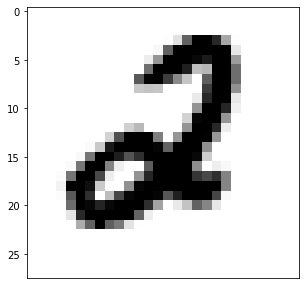

In [44]:
two = predicting_data[55].reshape(28,28)
predict_two = predicting_data[55]
plt.figure(figsize=(5,5))
plt.xticks([])
plt.imshow(two, cmap="gray_r")

In [45]:
knn(training_data, training_labels, predict_two, 4)

(2, [233, 8591, 375, 339])

In [50]:
training_labels[233]

2

In [51]:
training_labels[8591]

2

In [52]:
training_labels[375]

2

In [53]:
training_labels[339]

2

***Number 9***

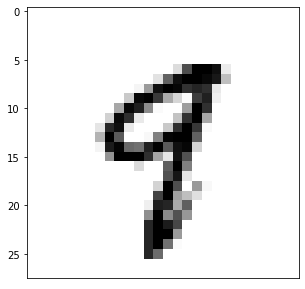

In [54]:
nine = predicting_data[3625].reshape(28,28)
predict_nine = predicting_data[3625]
plt.figure(figsize=(5,5))
plt.xticks([])
plt.imshow(nine, cmap="gray_r")

In [55]:
knn(training_data, training_labels, predict_nine, 4)

(9, [6779, 6439, 27679, 6599])

In [56]:
training_labels[6779]

9

In [57]:
training_labels[6439]

9

In [58]:
training_labels[27679]

9

In [59]:
training_labels[6599]

9

***Number 7***

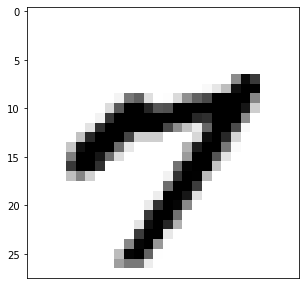

In [47]:
seven = predicting_data[5225].reshape(28,28)
predict_seven = predicting_data[5225]
plt.figure(figsize=(5,5))
plt.xticks([])
plt.imshow(seven, cmap="gray_r")

In [48]:
knn(training_data, training_labels, predict_seven, 4)

(7, [4303, 27709, 101, 16143])

In [60]:
training_labels[4303]

7

In [61]:
training_labels[27709]

7

In [62]:
training_labels[101]

7

In [63]:
training_labels[16143]

7

## Conclusion:
---

To conclude, the `knn()` function is a supervised machine learning algorithm that learns from the training data thats fed into the algorithm. The k-Nearest Neighbors algorithm regards anything that's closest in proximity to be related, thus the use of the Euclidean Distance formula. This algorithm is optimal for our purpose as our intent is to implement it into recognizing handwritten digits ranging from 0 to 9.

During the testing, the k-NN algorithm was consistly able to return the correct predicted label of `x`, our 1-dimensional array representing an image of a handwritten digit. Using the other half of the training data, arrays correlating to label 2, 9, and 7 were accurately predicted, with the 4 closest neighbors also representing the corresponding label. 

The `knn()` function could also be used to train a machine to recognize other forms of data as long as it specifically meets the needs. The use of k-NN is broad but also limited as it's purpose is to correlate data based on proximity. The closer the inputted data, `x`, is to the template, `training_data`, the more likely it is to be determined as the same.